In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
#Read image
img = cv.imread("ntust_gray.jpg",0)
#Show information of image
print(img.dtype)
print(img.shape)

uint8
(480, 640)


In [3]:
#Turn to double type, and range in [0,1]
img = img.astype(float) / 255

In [4]:
#sobel kernel
Gx = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
Gy = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

In [5]:
#convolution
rows, colums=img.shape
tmpx = np.zeros(img.shape)
tmpy = np.zeros(img.shape)
for row in range(rows):
    for colum in range(colums):
        if ((row-1 > 0)&(colum-1 > 0)&(row+1 < rows)&(colum+1 < colums)):
            tmpx[row, colum] = np.sum(np.multiply(img[row-1:row+2,colum-1:colum+2],Gx))*0.5
            tmpy[row, colum] = np.sum(np.multiply(img[row-1:row+2,colum-1:colum+2],Gy))*0.5

In [6]:
#Absolute 
result = abs(tmpx) + abs(tmpy)
#Binarization
thresh = np.mean(result)
maxval = 255
result = (result > thresh) * maxval

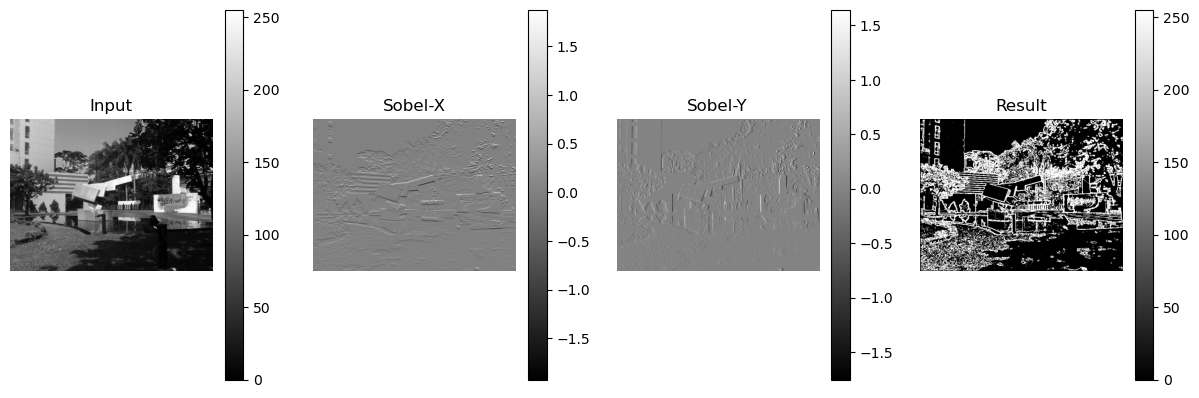

In [7]:
# Create folder
if not os.path.exists('images'):    
    os.makedirs('images')

# Show all images
imgs = [img*maxval, tmpx, tmpy, result]
titles = ['Input', 'Sobel-X', 'Sobel-Y', 'Result']
fig = plt.figure()
fig.set_figwidth(15)
for i in range(4):
    # Save image
    cv.imwrite('images/'+titles[i]+'.jpg', imgs[i])
    # Plot image    
    plt.subplot(1,4,i+1)
    plt.imshow(imgs[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')
    plt.colorbar()
plt.savefig('images/All-Result-Sobel.jpg')
plt.show()
